#  <h1 style="text-align:center;">Lab 3 Assignment: Multi Linear Regression</h1>

Aim: Write a script to implement following for the given Dataset Bengaluru 
Housing Dataset/ Boston Housing Dataset.

Perform the following:
Exercise 1: Draw a scatter plot for the data mentioned for given attributes.

Exercise 2: Perform Data pre-processing.

Exercise 3: Performs gradient descent to learn `theta`. (using the library and 
without using the library). Compare the values of ‘theta’ in both cases.

Exercise 4: Splitting data into the training and testing, 60:40, 70:30, ND 80:20.

Exercise 5: Train multilinear regression model and test USING Gradient Descent 
and using the library. Compare your results with Simple Linear Regression.

Exercise 6: Did you expect ridge regression to outperform the lasso, or vice versa?
Which predictors turned out to be important in the final model(s)?

# Exercise 1: 

Draw a scatter plot for the data mentioned for given attributes.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error

In [2]:
df = pd.read_csv(r"C:\Users\raval\jupyter_notebook\pdeu_data_science\prml_lab\bhp.csv")
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13196,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


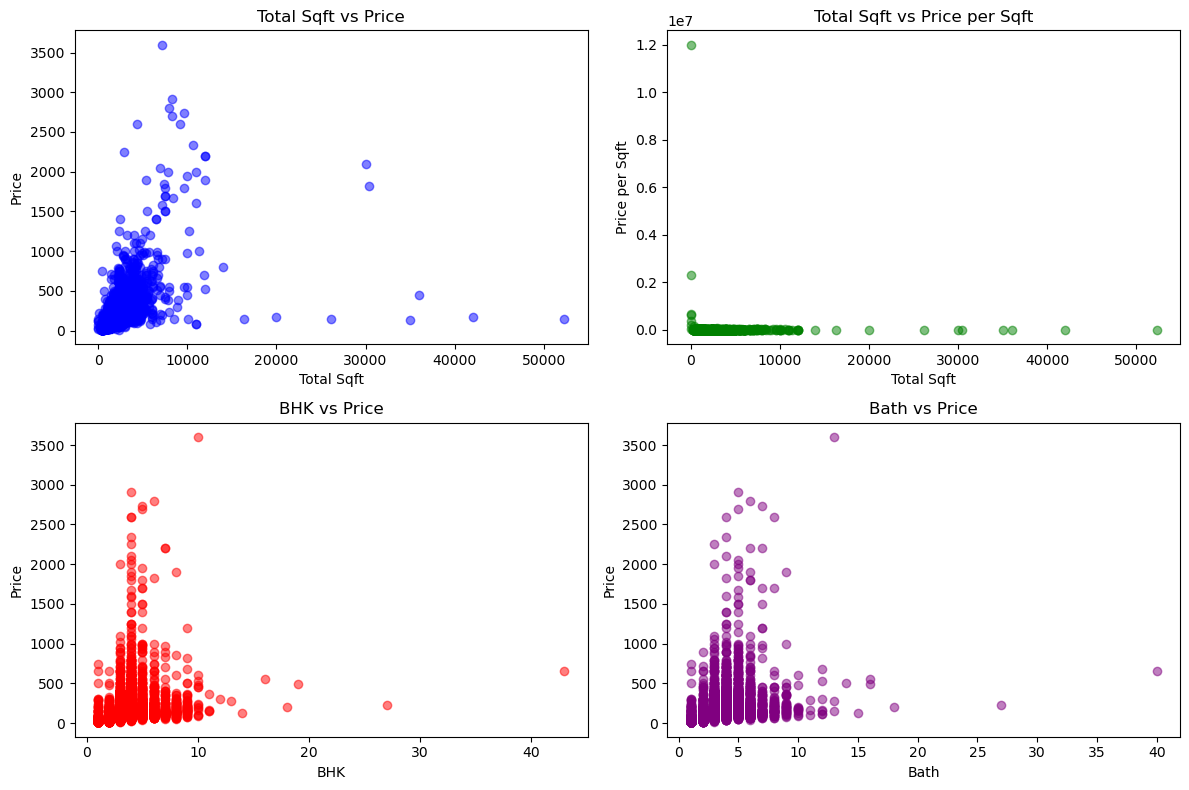

In [3]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Scatter plot 1 - Total Sqft vs Price
axes[0, 0].scatter(df['total_sqft'], df['price'], c='blue', alpha=0.5)
axes[0, 0].set_title('Total Sqft vs Price')
axes[0, 0].set_xlabel('Total Sqft')
axes[0, 0].set_ylabel('Price')

# Scatter plot 2 - Total Sqft vs Price per Sqft
axes[0, 1].scatter(df['total_sqft'], df['price_per_sqft'], c='green', alpha=0.5)
axes[0, 1].set_title('Total Sqft vs Price per Sqft')
axes[0, 1].set_xlabel('Total Sqft')
axes[0, 1].set_ylabel('Price per Sqft')

# Scatter plot 3 - BHK vs Price
axes[1, 0].scatter(df['bhk'], df['price'], c='red', alpha=0.5)
axes[1, 0].set_title('BHK vs Price')
axes[1, 0].set_xlabel('BHK')
axes[1, 0].set_ylabel('Price')

# Scatter plot 4 - Bath vs Price
axes[1, 1].scatter(df['bath'], df['price'], c='purple', alpha=0.5)
axes[1, 1].set_title('Bath vs Price')
axes[1, 1].set_xlabel('Bath')
axes[1, 1].set_ylabel('Price')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# Exercise 2: 

Perform Data pre-processing.

In [4]:
df.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

data is pre-processed already 

# Exercise 3: 

Performs gradient descent to learn `theta`. (using the library and 
without using the library). Compare the values of ‘theta’ in both cases.

In [5]:
x = df[['bhk']].values
y = df['price_per_sqft'].values
Theta = np.zeros(x.shape[1])
Theta_0 = 0
learning_rate = 0.001
epochs = 10000
n = float(len(x))
for i in range(epochs):

    y_pred = np.dot(x, Theta) + Theta_0
    d_theta = (-2/n) * np.dot(x.T, (y - y_pred))
    d_theta_0 = (-2/n) * np.sum(y - y_pred)
    Theta = Theta - learning_rate * d_theta
    Theta_0 = Theta_0 - learning_rate * d_theta_0
print("Thetas without using a library:", Theta)
print("Intercept (Theta_0):", Theta_0)

Thetas without using a library: [2555.38725194]
Intercept (Theta_0): 763.5548130675422


In [6]:
x = df[['bhk']]
y = df['price_per_sqft']

model = LinearRegression()
model.fit(x, y)
theta_values = model.coef_
theta_0 = model.intercept_

print("Theta values (Coefficients):", theta_values)
print("Theta_0 (Intercept):", theta_0)

Theta values (Coefficients): [2555.40479612]
Theta_0 (Intercept): 763.4962168177162


# Exercise 4: 

Splitting data into the training and testing, 60:40, 70:30 ND 80:20.

In [7]:
X= df[['bhk','total_sqft','bath']]
y = df['price_per_sqft']

60:40 split

In [8]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.4, random_state=1)
X_train.shape,X_test.shape

((7920, 3), (5280, 3))

70:30 split

In [9]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=1)
X_train.shape,X_test.shape

((9240, 3), (3960, 3))

80:20 split

In [10]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape,X_test.shape

((10560, 3), (2640, 3))

# Exercise 5: 

Train Multilinear regression model and test USING gradient descent and using the library. Compare your results with simple linear regression

In [23]:
# Performs gradient descent to learn theta, without using the Library

x1, x2, x3 = df['bhk'], df['total_sqft'], df['bath']
y= df["price_per_sqft"]

Theta_0  = 0.6
Theta_1 = 0.2
Theta_2 = 0.3
Theta_3 = 0.7

L = 0.000001
epochs= 100
n = float(len(df))

for i in range(epochs):
    y_pred = Theta_0 + Theta_1*x1 + Theta_2*x2 + Theta_3*x3  
    d_theta_0 = (-2/n)*sum(y - y_pred) 
    d_theta_1 = (-2/n)*sum(x1 *(y - y_pred)) 
    d_theta_2 = (-2/n) * sum(x2* (y - y_pred))
    d_theta_3 = (-2/n)* sum(x3* (y - y_pred)) 

    Theta_0= Theta_0- L *d_theta_0 
    Theta_1= Theta_1- L *d_theta_1    
    Theta_2= Theta_2- L *d_theta_2   
    Theta_3= Theta_3- L *d_theta_3    

    print("Theta without using library: ", Theta_0, Theta_1, Theta_2, Theta_3)

Theta without using library:  0.6149022487058641 0.24994557757968294 20.374742700459706 0.7485360392003488
Theta without using library:  0.5673593202163109 0.10277101428478422 -118.13476417797173 0.6029021453037219
Theta without using library:  0.9506665381041666 1.3156568605508223 837.533991629799 1.7969733422831333
Theta without using library:  -1.638748782602545 -6.855421677213238 -5756.261172881948 -6.252474828469451
Theta without using library:  16.282626110699677 49.71971172090359 39738.71879906596 49.475265442449235
Theta without using library:  -107.31358961734628 -340.43235693947344 -274161.4217107906 -334.8382583248831
Theta without using library:  745.5142200386781 2351.6837991718676 1891644.5220125094 2316.9857074613533
Theta without using library:  -5138.6570523627115 -16222.819527186166 -13051691.850775259 -15979.523170596345
Theta without using library:  35460.21126300089 111935.23614757853 90052329.35154088 110260.4556390197
Theta without using library:  -244658.3411956

Theta without using library:  -1.6048260538124782e+79 -5.065938796516543e+79 -4.075582765240592e+82 -4.990119476370354e+79
Theta without using library:  1.1072762825604548e+80 3.4953282724690217e+80 2.812015746405881e+83 3.4430154783451415e+80
Theta without using library:  -7.639835875098354e+80 -2.4116595606567755e+81 -1.9401967800714904e+84 -2.3755654830025396e+81


In [14]:
# # Create a DataFrame with your features
# data = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3})

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) to evaluate the model
mse = mean_squared_error(y_test, y_pred)

print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")
print(f"Mean Squared Error: {mse}")

Coefficients: [1491.71288993   -1.94961844 1933.72142831]
Intercept: 1717.623832424195
Mean Squared Error: 1986674652.4347043


The Value of Thetas for without library and with library are different to each other , the without library falling short by a very large numbers at 100 epochs and 0.0001 learning rate

In [13]:
X= df[['bhk','total_sqft','bath']]

# Exercise 6

Did you expect ridge regression to outperform the lasso ,or vice versa ?

In [24]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
X= df[['bhk','total_sqft','bath']]
y = df['price']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

Lasso

In [27]:
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)
l_mse = mean_squared_error(y_test, lasso_pred)
l_r2 = r2_score(y_test, lasso_pred)

In [28]:
print("Mean Square Error:", l_mse)
print("R-2 :", l_r2)

Mean Square Error: 11553.307662056648
R-2 : 0.46703493251013517


Ridge

In [29]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)
r_mse = mean_squared_error(y_test, ridge_pred)
r_r2 = r2_score(y_test, ridge_pred)

In [30]:
print("Mean Square Error:", r_mse)
print("R-2:", r_r2)

Mean Square Error: 11582.80239988878
R-2: 0.46567431220994837


Expected Ridge to perform better due to regularization factor/ bias being squared allowing for faster regularization but here 

# Exercise 7

Which predictors turned out to be important in the final models(s)?

"bath" appears to be the most important feature for price prediction in your model, as it has the largest positive coefficient. This suggests that the number of bathrooms has a significant impact on the price.

"bhk" is also important, but it has a slightly smaller positive coefficient, indicating that the number of bedrooms (bhk) is another influential factor in price prediction.

"total_sqft" has a negative coefficient, which suggests that an increase in total square footage is associated with a decrease in price in your model. This may be counterintuitive and could indicate an issue with the model or data. You should further investigate this feature and its relationship with the target variable.